<a href="https://colab.research.google.com/github/JamesHudsonn/3803ICT/blob/main/notebooks/colab-fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Colab with GitHub



In [1]:
from tensorflow.keras.datasets import fashion_mnist

#TODO: load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#TODO: Resample the dataset if needed
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

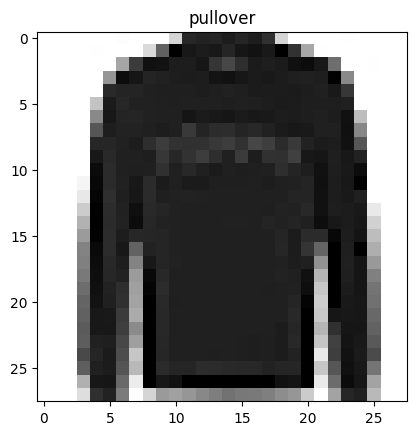

54222


In [7]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# np.random.seed(0)
idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()

In [10]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

X_train_norm = X_train/255
X_test_norm = X_test/255

# TODO: reshape the image data (2D array) into input 1D array for a neural network
print(np.shape(X_train_norm))
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
print(np.shape(X_train_norm))
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))

(60000, 28, 28)
(60000, 784)


In [15]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()

    # Add 2 dense layers with 10 neurons each using sigmoid or relu activation
    model.add(Dense(10, input_dim=input_dim, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    
    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

my_model(X_train_norm.shape[1]).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [17]:
import os

#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# os.environ['KMP_DUPLICATE_LIB_OK']='True' 

# TODO: Compile and fit your model
model = my_model(X_train_norm.shape[1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 3s 2ms/step - loss: 1.9818 - accuracy: 0.4956
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 1.2921 - accuracy: 0.6769
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.9080 - accuracy: 0.7272
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.7453 - accuracy: 0.7768
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6501 - accuracy: 0.8069
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5791 - accuracy: 0.8243
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.5270 - accuracy: 0.8354
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.8420
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.8468
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.8512

In [18]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

accuracy on train with NN: 0.8865666389465332
accuracy on test with NN: 0.8579999804496765


In [19]:
# TODO: Redo the classification with PCA and classification model
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [20]:
# TODO: use any classifier you want
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

print('score with RF on train', rf.score(X_train_pca, y_train))
print('score with RF on train', rf.score(X_test_pca, y_test))

score with RF on train 1.0
score with RF on train 0.8613
